In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
cj_enm = pd.read_excel('cj_enm.xlsx')

In [3]:
cj_enm.head()

,일자,시가,고가,저가,종가,거래량
0,2010-01-01,74600,78500,74000,77500,73106
1,2010-01-02,74600,78500,74000,77500,73106
2,2010-01-03,74600,78500,74000,77500,73106
3,2010-01-04,77500,78400,76600,76700,52604
4,2010-01-05,76800,77400,75800,77100,57212


In [4]:
cj_enm.tail()

,일자,시가,고가,저가,종가,거래량
4179,2021-06-11,166600,168300,166500,168000,103046
4180,2021-06-12,166600,168300,166500,168000,103046
4181,2021-06-13,166600,168300,166500,168000,103046
4182,2021-06-14,166900,167000,162500,165500,138711
4183,2021-06-15,165900,166600,164300,165200,88353


In [5]:
cj_enm.describe()

,시가,고가,저가,종가,거래량
count,4184.000000,4184.000000,4184.000000,4184.000000,4.184000e+03
mean,217258.293499,220313.073614,213837.093690,217351.099426,5.590108e+04
std,75300.365962,76346.780423,74058.490048,75441.983946,7.124230e+04
min,62500.000000,64400.000000,61700.000000,62500.000000,0.000000e+00
25%,163200.000000,164200.000000,161200.000000,162900.000000,1.909025e+04
50%,211500.000000,213750.000000,207600.000000,211500.000000,3.360100e+04
75%,257525.000000,261700.000000,252000.000000,257650.000000,6.613575e+04
max,426100.000000,431600.000000,415400.000000,426100.000000,1.421672e+06


In [6]:
cj_enm

,일자,시가,고가,저가,종가,거래량
0,2010-01-01,74600,78500,74000,77500,73106
1,2010-01-02,74600,78500,74000,77500,73106
2,2010-01-03,74600,78500,74000,77500,73106
3,2010-01-04,77500,78400,76600,76700,52604
4,2010-01-05,76800,77400,75800,77100,57212
...,...,...,...,...,...,...
4179,2021-06-11,166600,168300,166500,168000,103046
4180,2021-06-12,166600,168300,166500,168000,103046
4181,2021-06-13,166600,168300,166500,168000,103046
4182,2021-06-14,166900,167000,162500,165500,138711


In [7]:
cj_enm['일자']

0      2010-01-01
1      2010-01-02
2      2010-01-03
3      2010-01-04
4      2010-01-05
          ...    
4179   2021-06-11
4180   2021-06-12
4181   2021-06-13
4182   2021-06-14
4183   2021-06-15
Name: 일자, Length: 4184, dtype: datetime64[ns]

In [8]:
cj_enm['종가']

0        77500
1        77500
2        77500
3        76700
4        77100
         ...  
4179    168000
4180    168000
4181    168000
4182    165500
4183    165200
Name: 종가, Length: 4184, dtype: int64

In [9]:
cj_enm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      4184 non-null   datetime64[ns]
 1   시가      4184 non-null   int64         
 2   고가      4184 non-null   int64         
 3   저가      4184 non-null   int64         
 4   종가      4184 non-null   int64         
 5   거래량     4184 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 196.2 KB


Text(0, 0.5, 'price')

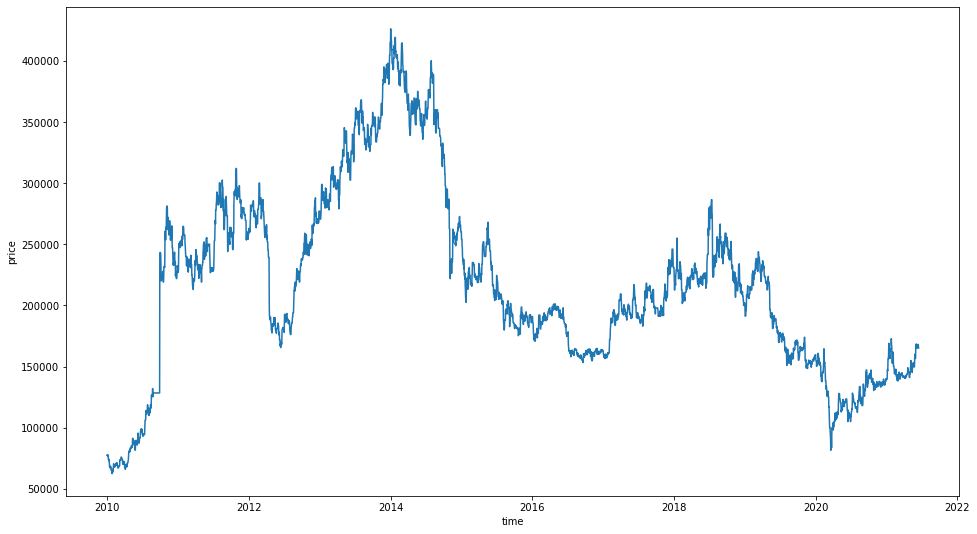

In [10]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=cj_enm['종가'], x=cj_enm['일자'])
plt.xlabel('time')
plt.ylabel('price')

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '종가', '거래량']
df_scaled = scaler.fit_transform(cj_enm[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

            시가        고가        저가        종가       거래량
0     0.033278  0.038399  0.034775  0.041254  0.051423
1     0.033278  0.038399  0.034775  0.041254  0.051423
2     0.033278  0.038399  0.034775  0.041254  0.051423
3     0.041254  0.038126  0.042126  0.039054  0.037002
4     0.039329  0.035403  0.039864  0.040154  0.040243
...        ...       ...       ...       ...       ...
4179  0.286304  0.282952  0.296296  0.290154  0.072482
4180  0.286304  0.282952  0.296296  0.290154  0.072482
4181  0.286304  0.282952  0.296296  0.290154  0.072482
4182  0.287129  0.279412  0.284987  0.283278  0.097569
4183  0.284378  0.278322  0.290076  0.282453  0.062147

[4184 rows x 5 columns]


In [12]:
df = df_scaled

In [13]:
df

,시가,고가,저가,종가,거래량
0,0.033278,0.038399,0.034775,0.041254,0.051423
1,0.033278,0.038399,0.034775,0.041254,0.051423
2,0.033278,0.038399,0.034775,0.041254,0.051423
3,0.041254,0.038126,0.042126,0.039054,0.037002
4,0.039329,0.035403,0.039864,0.040154,0.040243
...,...,...,...,...,...
4179,0.286304,0.282952,0.296296,0.290154,0.072482
4180,0.286304,0.282952,0.296296,0.290154,0.072482
4181,0.286304,0.282952,0.296296,0.290154,0.072482
4182,0.287129,0.279412,0.284987,0.283278,0.097569


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
feature_cols = ['시가', '고가', '저가', '종가', '거래량']
label_cols = ['종가']

feature = df[feature_cols]
label = df[label_cols]
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=0, shuffle=False)

In [16]:
x_train.shape, y_train.shape

((3347, 5), (3347, 1))

In [17]:
x_test.shape, y_test.shape

((837, 5), (837, 1))

In [18]:
x_train

,시가,고가,저가,종가,거래량
0,0.033278,0.038399,0.034775,0.041254,0.051423
1,0.033278,0.038399,0.034775,0.041254,0.051423
2,0.033278,0.038399,0.034775,0.041254,0.051423
3,0.041254,0.038126,0.042126,0.039054,0.037002
4,0.039329,0.035403,0.039864,0.040154,0.040243
...,...,...,...,...,...
3342,0.462596,0.463235,0.473000,0.472497,0.055040
3343,0.472222,0.465959,0.476675,0.475798,0.030961
3344,0.475523,0.467048,0.478654,0.476898,0.025286
3345,0.475798,0.473584,0.486571,0.483498,0.069098


In [19]:
y_train

,종가
0,0.041254
1,0.041254
2,0.041254
3,0.039054
4,0.040154
...,...
3342,0.472497
3343,0.475798
3344,0.476898
3345,0.483498


In [20]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [21]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [22]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [23]:
train_data

<PrefetchDataset shapes: ((None, None, 1, 1), (None, 1, 1)), types: (tf.float64, tf.float64)>

In [24]:
for data in train_data.take(1):
    #print(f'데이터셋(X) 샘플: {data[0]}')
    #print(f'데이터셋(Y) 샘플: {data[1]}')
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1, 1)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

In [26]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [27]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [28]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
104/104 [==============================] - 3s 10ms/step - loss: 0.0277 - mse: 0.0554 - val_loss: 0.0012 - val_mse: 0.0023

Epoch 00001: val_loss improved from inf to 0.00115, saving model to tmp\ckeckpointer.ckpt
Epoch 2/50
104/104 [==============================] - 1s 6ms/step - loss: 5.7331e-04 - mse: 0.0011 - val_loss: 1.5661e-04 - val_mse: 3.1322e-04

Epoch 00002: val_loss improved from 0.00115 to 0.00016, saving model to tmp\ckeckpointer.ckpt
Epoch 3/50
104/104 [==============================] - 1s 7ms/step - loss: 3.8023e-04 - mse: 7.6046e-04 - val_loss: 1.2725e-04 - val_mse: 2.5450e-04

Epoch 00003: val_loss improved from 0.00016 to 0.00013, saving model to tmp\ckeckpointer.ckpt
Epoch 4/50
104/104 [==============================] - 1s 6ms/step - loss: 3.6086e-04 - mse: 7.2171e-04 - val_loss: 1.6590e-04 - val_mse: 3.3180e-04

Epoch 00004: val_loss did not improve from 0.00013
Epoch 5/50
104/104 [==============================] - 1s 6ms/step - loss: 3.4023e-04 - mse: 6.

Epoch 39/50
104/104 [==============================] - 1s 7ms/step - loss: 1.2035e-04 - mse: 2.4070e-04 - val_loss: 4.4989e-05 - val_mse: 8.9979e-05

Epoch 00039: val_loss improved from 0.00005 to 0.00004, saving model to tmp\ckeckpointer.ckpt
Epoch 40/50
104/104 [==============================] - 1s 6ms/step - loss: 1.1299e-04 - mse: 2.2598e-04 - val_loss: 7.3950e-05 - val_mse: 1.4790e-04

Epoch 00040: val_loss did not improve from 0.00004
Epoch 41/50
104/104 [==============================] - 1s 6ms/step - loss: 1.1677e-04 - mse: 2.3355e-04 - val_loss: 4.5161e-05 - val_mse: 9.0322e-05

Epoch 00041: val_loss did not improve from 0.00004
Epoch 42/50
104/104 [==============================] - 1s 6ms/step - loss: 1.1891e-04 - mse: 2.3782e-04 - val_loss: 5.7515e-05 - val_mse: 1.1503e-04

Epoch 00042: val_loss did not improve from 0.00004
Epoch 43/50
104/104 [==============================] - 1s 7ms/step - loss: 1.1330e-04 - mse: 2.2659e-04 - val_loss: 4.6527e-05 - val_mse: 9.3055e-05

Epo

In [29]:
model.load_weights(filename)

In [30]:
pred = model.predict(test_data)

In [31]:
pred.shape

(817, 1)

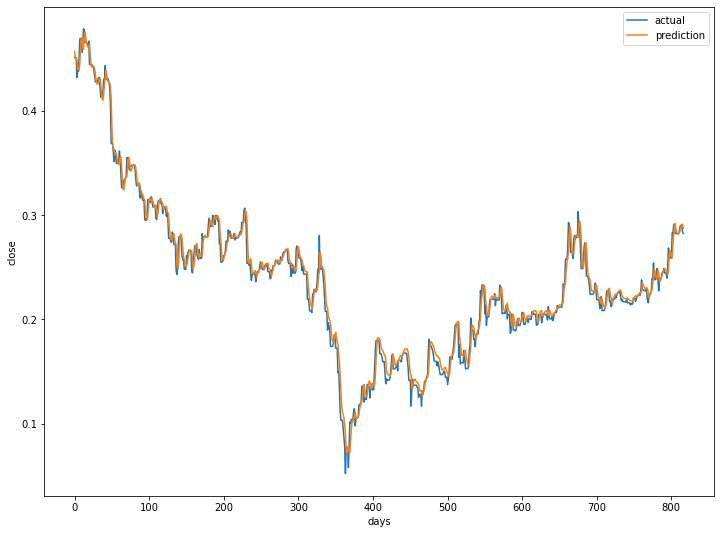

In [32]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.xlabel('days')
plt.ylabel('close')
plt.legend()
plt.show()

In [33]:
cj_enm = pd.read_excel('cj_enm.xlsx')

In [34]:
cj_enm['일자']

0      2010-01-01
1      2010-01-02
2      2010-01-03
3      2010-01-04
4      2010-01-05
          ...    
4179   2021-06-11
4180   2021-06-12
4181   2021-06-13
4182   2021-06-14
4183   2021-06-15
Name: 일자, Length: 4184, dtype: datetime64[ns]

In [35]:
df = df.join(cj_enm['일자'])

In [36]:
close_data = cj_enm['종가'].values
close_data

array([0.04125413, 0.04125413, 0.04125413, ..., 0.29015402, 0.28327833,
       0.28245325])

In [37]:
close_data = close_data.reshape(-1, 1)
close_data

array([[0.04125413],
       [0.04125413],
       [0.04125413],
       ...,
       [0.29015402],
       [0.28327833],
       [0.28245325]])

In [38]:
close_data = close_data.reshape((-1))
close_data

array([0.04125413, 0.04125413, 0.04125413, ..., 0.29015402, 0.28327833,
       0.28245325])

In [39]:
close_data[-2:]

array([0.28327833, 0.28245325])

In [40]:
close_data = close_data.reshape((-1))

look_back = 20

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df['일자'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 30
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [41]:
forecast

array([0.28245325, 0.2854116 , 0.2844097 , 0.28467125, 0.28522325,
       0.28541434, 0.28570271, 0.2860592 , 0.28637338, 0.28669792,
       0.28703475, 0.28736526, 0.28769416, 0.28802079, 0.28834099,
       0.28865457, 0.28895992, 0.28925776, 0.2895509 , 0.28983706,
       0.29012042, 0.29040009, 0.29067421, 0.29094505, 0.29121208,
       0.291475  , 0.29173446, 0.29199034, 0.29224259, 0.29249144,
       0.29273683])

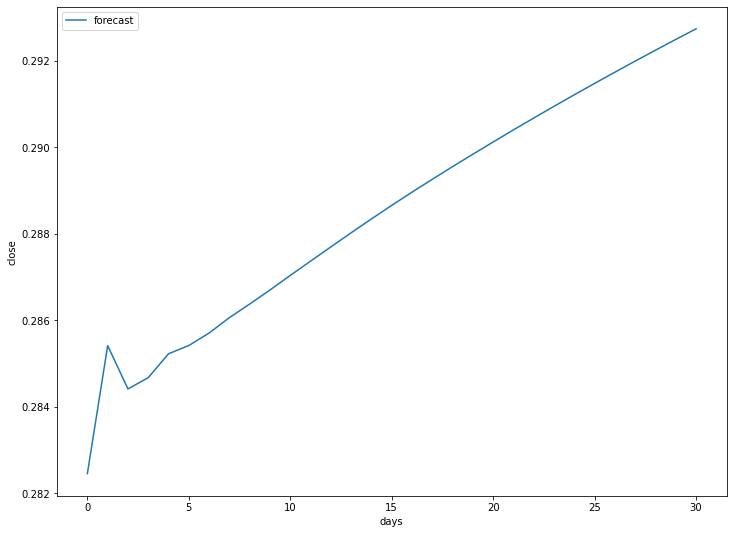

In [42]:
plt.figure(figsize=(12, 9))
plt.plot(forecast, label='forecast')
plt.xlabel('days')
plt.ylabel('close')
plt.legend()
plt.show()

# 볼린저 밴드 투자

## MFI

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_excel('cj_enm.xlsx')

In [3]:
df

,일자,시가,고가,저가,종가,거래량
0,2010-01-01,74600,78500,74000,77500,73106
1,2010-01-02,74600,78500,74000,77500,73106
2,2010-01-03,74600,78500,74000,77500,73106
3,2010-01-04,77500,78400,76600,76700,52604
4,2010-01-05,76800,77400,75800,77100,57212
...,...,...,...,...,...,...
4179,2021-06-11,166600,168300,166500,168000,103046
4180,2021-06-12,166600,168300,166500,168000,103046
4181,2021-06-13,166600,168300,166500,168000,103046
4182,2021-06-14,166900,167000,162500,165500,138711


In [4]:
mask = (df['일자'] > '2020-01-1') & (df['일자'] <= '2021-06-15')
df=df.loc[mask]
df = pd.DataFrame(data=df)
print(df)

             일자      시가      고가      저가      종가     거래량
3653 2020-01-02  159300  159400  151000  155600  125376
3654 2020-01-03  155800  157500  153100  154700   98855
3655 2020-01-04  155800  157500  153100  154700   98855
3656 2020-01-05  155800  157500  153100  154700   98855
3657 2020-01-06  153000  153900  150200  150200   78272
...         ...     ...     ...     ...     ...     ...
4179 2021-06-11  166600  168300  166500  168000  103046
4180 2021-06-12  166600  168300  166500  168000  103046
4181 2021-06-13  166600  168300  166500  168000  103046
4182 2021-06-14  166900  167000  162500  165500  138711
4183 2021-06-15  165900  166600  164300  165200   88353

[531 rows x 6 columns]


In [5]:
df.reset_index(inplace=True)
df

,index,일자,시가,고가,저가,종가,거래량
0,3653,2020-01-02,159300,159400,151000,155600,125376
1,3654,2020-01-03,155800,157500,153100,154700,98855
2,3655,2020-01-04,155800,157500,153100,154700,98855
3,3656,2020-01-05,155800,157500,153100,154700,98855
4,3657,2020-01-06,153000,153900,150200,150200,78272
...,...,...,...,...,...,...,...
526,4179,2021-06-11,166600,168300,166500,168000,103046
527,4180,2021-06-12,166600,168300,166500,168000,103046
528,4181,2021-06-13,166600,168300,166500,168000,103046
529,4182,2021-06-14,166900,167000,162500,165500,138711


In [6]:
df.drop("index", axis=1,inplace=True)

In [7]:
df.set_index('일자', inplace=True)
df

,시가,고가,저가,종가,거래량
일자,,,,,
2020-01-02,159300,159400,151000,155600,125376
2020-01-03,155800,157500,153100,154700,98855
2020-01-04,155800,157500,153100,154700,98855
2020-01-05,155800,157500,153100,154700,98855
2020-01-06,153000,153900,150200,150200,78272
...,...,...,...,...,...
2021-06-11,166600,168300,166500,168000,103046
2021-06-12,166600,168300,166500,168000,103046
2021-06-13,166600,168300,166500,168000,103046


In [8]:
df['MA20'] = df['종가'].rolling(window=20).mean()
df['stddev'] = df['종가'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['종가'] - df['lower']) / (df['upper'] - df['lower'])
df['bandwidth'] = (df['upper'] - df['lower'])/df['MA20'] * 100
df['TP'] = (df['고가'] + df['저가'] + df['종가']) / 3
df['PMF'] = 0 #positive money flow
df['NMF'] = 0 #negative money flow
for i in range(len(df.종가)-1):
    if df.TP.values[i] < df.TP.values[i+1]:
        df.PMF.values[i+1] = df.TP.values[i+1] * df.거래량.values[i+1]
        df.NMF.values[i+1]
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.거래량.values[i+1]
        df.PMF.values[i+1] = 0
df['MFR'] = df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum()
df['MF10'] = 100 - 100 / (1+df['MFR'])
df = df[19:]

In [9]:
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False 

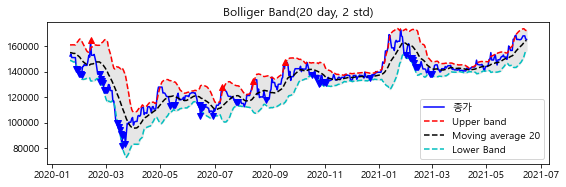

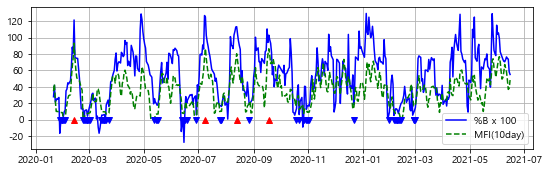

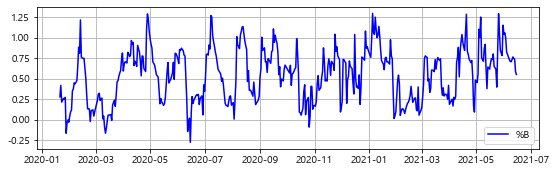

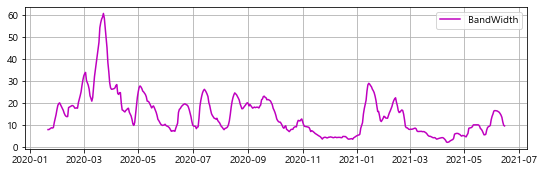

In [10]:
#붉은색 매수, 파란색 매도
plt.figure(figsize=(9,12))
plt.subplot(4, 1, 1)
plt.title('Bolliger Band(20 day, 2 std)')
plt.plot(df.index, df['종가'], color='#0000ff', label='종가')
plt.plot(df.index, df['upper'], 'r--', label='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label='Lower Band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(len(df.종가)):
    if df.PB.values[i] > 0.8 and df.MF10.values[i] > 80:
        plt.plot(df.index.values[i], df.종가.values[i], 'r^')
    elif df.PB.values[i] < 0.2 and df.MF10.values[i] < 20:
        plt.plot(df.index.values[i], df.종가.values[i], 'bv')
plt.legend(loc='best')

plt.figure(figsize=(9, 12))
plt.subplot(4, 1, 2)
plt.plot(df.index, df['PB'] * 100, 'b', label='%B x 100')
plt.plot(df.index, df['MF10'], 'g--',label='MFI(10day)')
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])
for i in range(len(df.종가)):
    if df.PB.values[i] > 0.8 and df.MF10.values[i] > 80:
        plt.plot(df.index.values[i], 0, '^r')
    elif df.PB.values[i] < 0.2 and df.MF10.values[i] < 20:
        plt.plot(df.index.values[i], 0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show();

plt.figure(figsize=(9,12))
plt.subplot(4, 1, 3)
plt.plot(df.index, df['PB'], color='b', label='%B')
plt.grid(True)
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(9,12))
plt.subplot(4, 1, 4)
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth')
plt.grid(True)
plt.legend(loc='best')
plt.show()

## 일중강도

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('cj_enm.xlsx')

In [3]:
mask = (df['일자'] > '2020-01-1') & (df['일자'] <= '2021-06-15')
df=df.loc[mask]
df = pd.DataFrame(data=df)
print(df)

             일자      시가      고가      저가      종가     거래량
3653 2020-01-02  159300  159400  151000  155600  125376
3654 2020-01-03  155800  157500  153100  154700   98855
3655 2020-01-04  155800  157500  153100  154700   98855
3656 2020-01-05  155800  157500  153100  154700   98855
3657 2020-01-06  153000  153900  150200  150200   78272
...         ...     ...     ...     ...     ...     ...
4179 2021-06-11  166600  168300  166500  168000  103046
4180 2021-06-12  166600  168300  166500  168000  103046
4181 2021-06-13  166600  168300  166500  168000  103046
4182 2021-06-14  166900  167000  162500  165500  138711
4183 2021-06-15  165900  166600  164300  165200   88353

[531 rows x 6 columns]


In [4]:
df.reset_index(inplace=True)
df.drop("index", axis=1,inplace=True)
df.set_index('일자', inplace=True)
df

,시가,고가,저가,종가,거래량
일자,,,,,
2020-01-02,159300,159400,151000,155600,125376
2020-01-03,155800,157500,153100,154700,98855
2020-01-04,155800,157500,153100,154700,98855
2020-01-05,155800,157500,153100,154700,98855
2020-01-06,153000,153900,150200,150200,78272
...,...,...,...,...,...
2021-06-11,166600,168300,166500,168000,103046
2021-06-12,166600,168300,166500,168000,103046
2021-06-13,166600,168300,166500,168000,103046


In [5]:
df['MA20'] = df['종가'].rolling(window=20).mean()
df['stddev'] = df['종가'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['PB'] = (df['종가'] - df['lower']) / (df['upper'] - df['lower'])
df['II'] = (2*df['종가'] - df['고가'] - df['저가'])/(df['고가'] - df['저가']) * df['거래량']
df['IIP21'] = df['II'].rolling(window=21).sum()/df['거래량'].rolling(window=21).sum()*100
df = df.dropna()

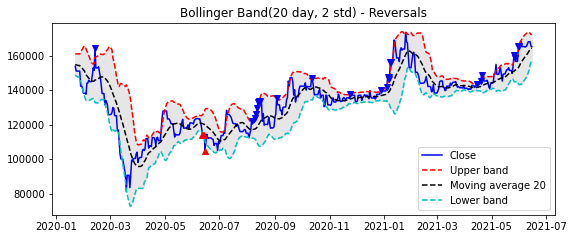

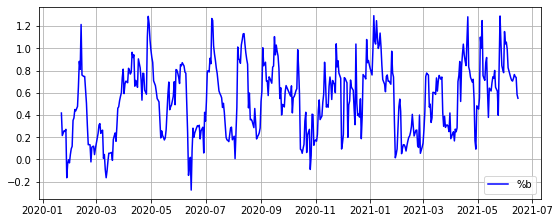

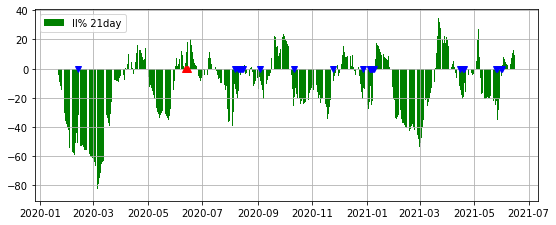

In [9]:
plt.figure(figsize=(9,12))
plt.subplot(3, 1, 1)
plt.title('Bollinger Band(20 day, 2 std) - Reversals')
plt.plot(df.index, df['종가'], 'b', label = 'Close')
plt.plot(df.index, df['upper'], 'r--', label = 'Upper band')
plt.plot(df.index, df['MA20'], 'k--', label = 'Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label = 'Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
for i in range(0, len(df.종가)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i]>0:
        plt.plot(df.index.values[i], df.종가.values[i], '^r')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i]<0:
        plt.plot(df.index.values[i], df.종가.values[i], 'bv')
plt.legend(loc='best')

plt.figure(figsize=(9,12))
plt.subplot(3, 1, 2)
plt.plot(df.index, df['PB'], 'b', label='%b')
plt.grid(True)
plt.legend(loc='best')

plt.figure(figsize=(9,12))
plt.subplot(3, 1, 3)
plt.bar(df.index, df['IIP21'], color='g', label='II% 21day')
for i in range(0, len(df.종가)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, '^r')
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i],0, 'bv')
plt.grid(True)
plt.legend(loc='best')
plt.show()